In [16]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

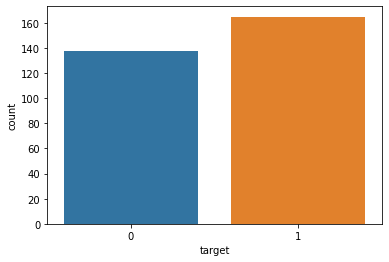

In [10]:
sns.countplot(x  = df['target'])

# Train the Model

In [12]:
from sklearn.model_selection import train_test_split

In [26]:
x=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=32,stratify=y)
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2


In [27]:
model=LogisticRegression()

In [28]:
model.fit(x_train,y_train)

LogisticRegression()

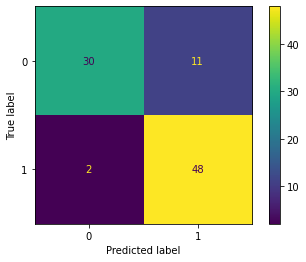

In [39]:
plot_confusion_matrix(model,x_test,y_test)

In [30]:
y_pred_prob = model.predict_proba(x_test)

In [31]:
y_pred = model.predict(x_test)

In [32]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("-"*65)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("-"*65)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[30 11]
 [ 2 48]]
-----------------------------------------------------------------
Accuracy Score: 0.8571428571428571
-----------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82        41
           1       0.81      0.96      0.88        50

    accuracy                           0.86        91
   macro avg       0.88      0.85      0.85        91
weighted avg       0.87      0.86      0.85        91



In [34]:
# Training data
y_pred_train = model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[ 75  22]
 [  9 106]]
*********************************************
Accuracy Score: 0.8537735849056604
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83        97
           1       0.83      0.92      0.87       115

    accuracy                           0.85       212
   macro avg       0.86      0.85      0.85       212
weighted avg       0.86      0.85      0.85       212



In [37]:
import pickle
import json

In [40]:
columns=x.columns.tolist()
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [41]:
dict1 = {'columns':columns}
dict1

{'columns': ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal']}

In [38]:
with open("log_heart.pkl",'wb') as f:
    pickle.dump(model,f)

In [43]:
with open("column_dict.json",'w') as f:
    json.dump(dict1,f)

In [2]:
dict1.keys()

NameError: name 'dict1' is not defined